In [16]:
!pip install -U pandas
!pip install -U numpy
!pip install -U plotly==5.10.0

In [17]:
# Question 3: Logistic Regression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

x = np.genfromtxt('../data/q3/logisticX.csv', delimiter=',')
y = np.genfromtxt('../data/q3/logisticY.csv', delimiter='\n')

y = np.reshape(y, (-1, 1))


In [18]:
# Normalize the data
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
print(x.mean(), x.std())

# Add intercept term to x
x = np.append(np.ones((x.shape[0], 1)), x, axis=1)

# Num of examples and features (with intercept)
m = x.shape[0]
n = x.shape[1]


-3.9968028886505634e-17 0.9999999999999998


In [19]:
# Question 3.a - Implement Newton’s method

# Initialize params
theta = np.zeros((n, 1))


def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


d = x.dot(theta)
sig = sigmoid(d)
diag = np.identity(x.shape[0]) * sig.T.dot(1-sig)
H = x.T.dot(diag.dot(x))

# Newton's Update Equation
grad = x.T.dot((sig-y))
t_final = theta - np.linalg.inv(H).dot(grad)
print(f"Theta from Newton's Method: {t_final}")


def predict(x, theta):
    return sigmoid(x.dot(theta))


predictions = predict(x, t_final)
with open('results.txt', 'w+') as f:
    for item in predictions:
        if item[0] >= 0.5:
            f.write('0\n')
        else:
            f.write('1\n')

    print("File written successfully")


Theta from Newton's Method: [[ 2.33674493e-18]
 [ 8.97341408e-03]
 [-9.20112283e-03]]
File written successfully


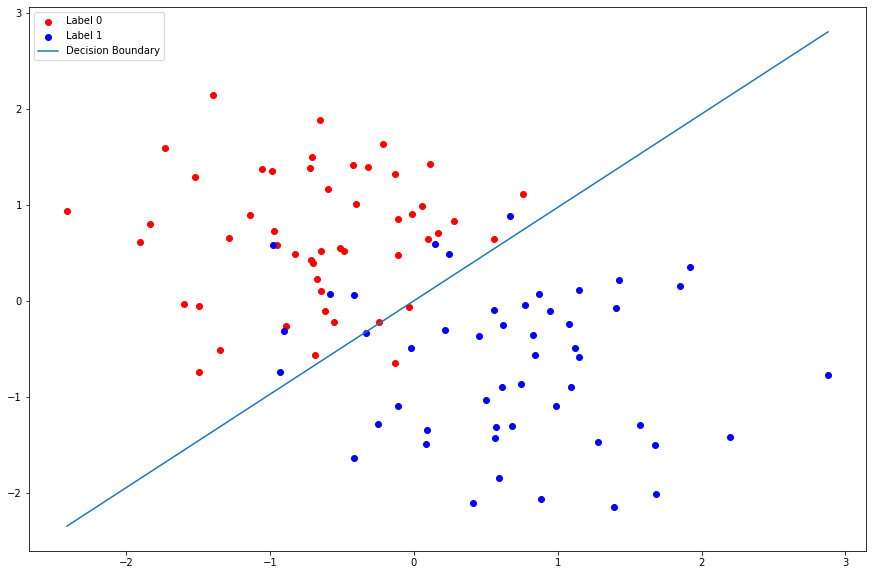

In [20]:
# Decision Boundary
i_x0 = [i for i in range(len(y)) if y[i] == 0]
i_x1 = [i for i in range(len(y)) if y[i] == 1]
x_val = np.array([np.min(x[:, 1]), np.max(x[:, 1])]).reshape(1, -1)
y_val = (-1./t_final[2:3]).dot(t_final[1:2].dot(x_val)) - t_final[:1]

plt.figure(figsize=(15, 10))
plt.scatter(x[i_x0][:, 1], x[i_x0][:, 2], c='r', label='Label 0')
plt.scatter(x[i_x1][:, 1], x[i_x1][:, 2], c='b', label='Label 1')
plt.plot(x_val.ravel(), y_val.ravel(), label='Decision Boundary')
plt.legend()
plt.savefig('q3_b.png', dpi=1000, bbox_inches='tight')
plt.show(block=False)
